# Gráficos

In [2]:
import simulation as sim
import generators as gen
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gens = [gen.GCL(), gen.XORShift(), gen.PCG()]
dataframes, colas = zip(*[sim.main(g) for g in gens])
dataframes = list(dataframes)
colas = list(colas)
nombres = [g.getName() for g in gens]

c:\Users\julig\Code\Modelos\ModelosTE\generators.py:86: RuntimeWarning: overflow encountered in scalar multiply
  self.state = np.uint64(x * self.multiplier + self.increment)
c:\Users\julig\Code\Modelos\ModelosTE\generators.py:89: RuntimeWarning: overflow encountered in scalar subtract
  random_u = random_int / (np.uint32(0)-1)
c:\Users\julig\Code\Modelos\ModelosTE\generators.py:86: RuntimeWarning: overflow encountered in scalar add
  self.state = np.uint64(x * self.multiplier + self.increment)


#### Tasa de utilización del servidor en función del tiempo

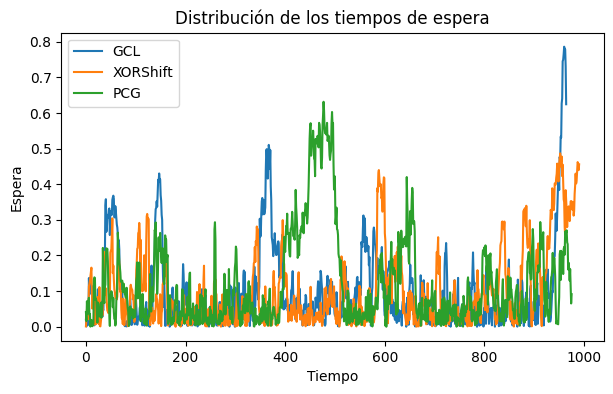

In [4]:
ax = None
for df, nombre in zip(dataframes, nombres):
    ax = df['TEnSistema'].plot(kind='line', figsize=(7, 4), label=nombre, ax=ax)
ax.set_title('Distribución de los tiempos de espera')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espera')
ax.legend()

#### Tiempo promedio en el sistema por cliente

<Axes: >

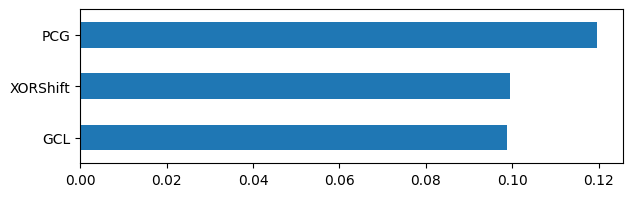

In [5]:
avgs = [df['TEnSistema'].mean() for df in dataframes]
df_avgs = pd.Series(avgs, index=nombres)
df_avgs.plot(kind='barh', figsize=(7, 2))

#### Distribución de los tiempos de espera

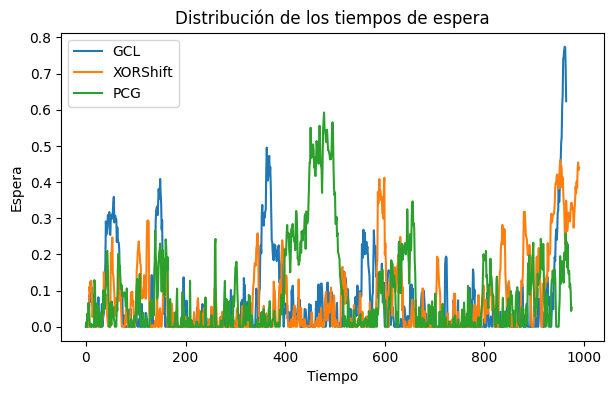

In [6]:
ax = None
for df, nombre in zip(dataframes, nombres):
    ax = df['TEspera'].plot(kind='line', figsize=(7, 4), label=nombre, ax=ax)
ax.set_title('Distribución de los tiempos de espera')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Espera')
ax.legend()

#### Porcentaje de tiempo que el servidor está ocupado

<Axes: >

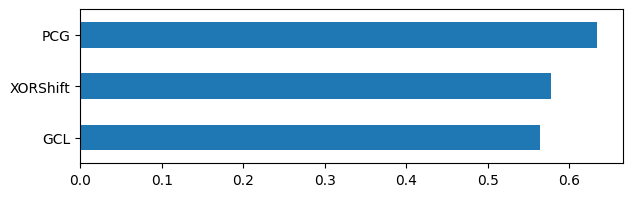

In [7]:
porcentaje = [df['Duracion'].sum() / df['TFin'].iloc[-1] for df in dataframes]
df = pd.Series(porcentaje, index=nombres)
df.plot(kind='barh', figsize=(7, 2))

#### Evolución de la longitud de la cola en el tiempo

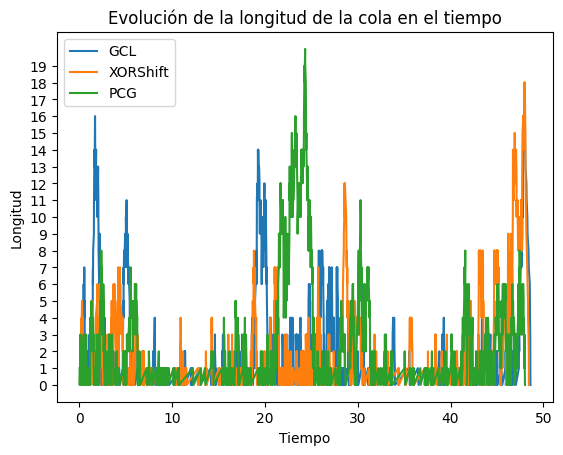

In [8]:
for cola, nombre in zip(colas, nombres):
    tiempo, longitud = zip(*cola)
    plt.plot(tiempo, longitud, label=nombre)

plt.yticks(range(0, 20))
plt.xlabel('Tiempo')
plt.ylabel('Longitud')
plt.title('Evolución de la longitud de la cola en el tiempo')
plt.legend()
plt.show()

#### Histograma de los tiempos de espera en el sistema

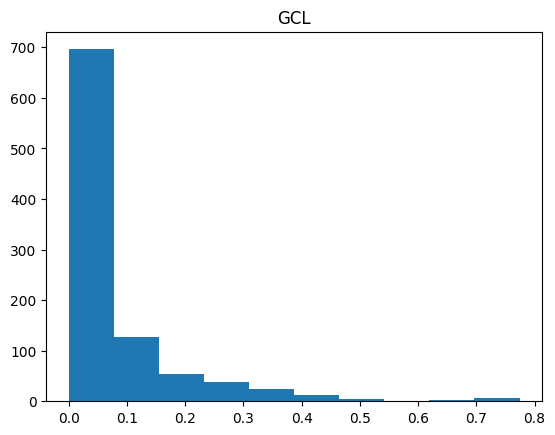

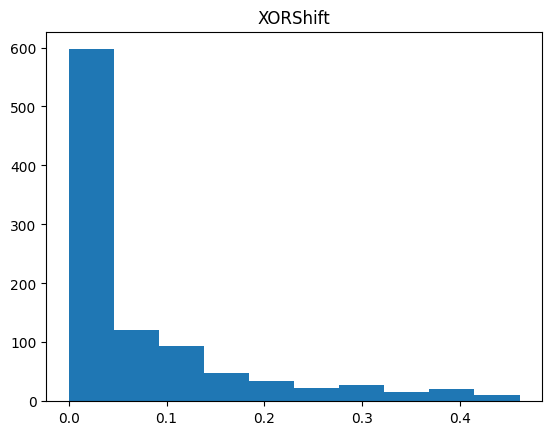

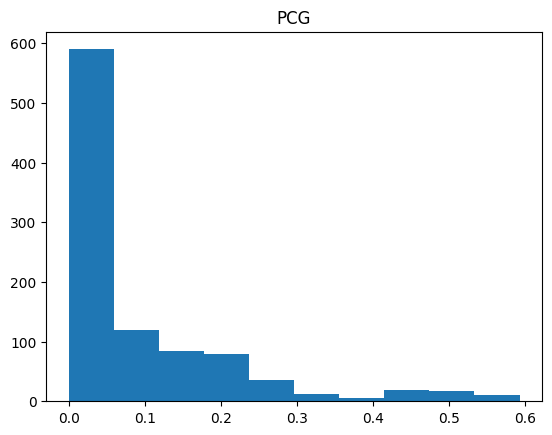

In [14]:
for df, nombre in zip(dataframes, nombres):
    plt.hist(df['TEspera'])
    plt.title(nombre)
    plt.show()

#### Distribución del tiempo entre arribos y de servicios simulados

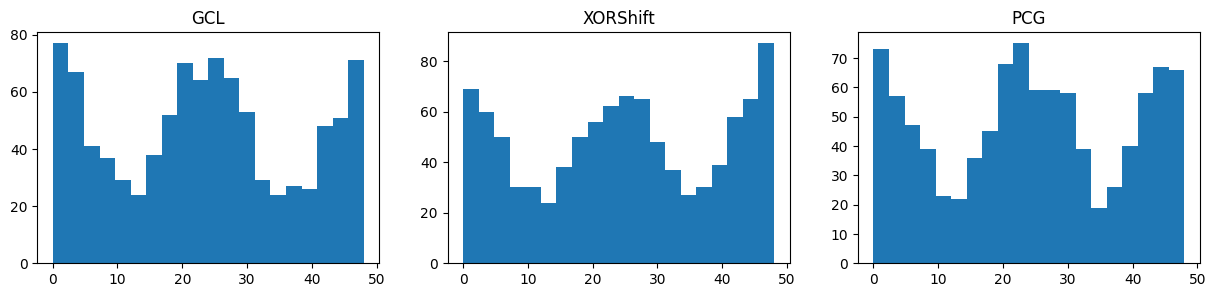

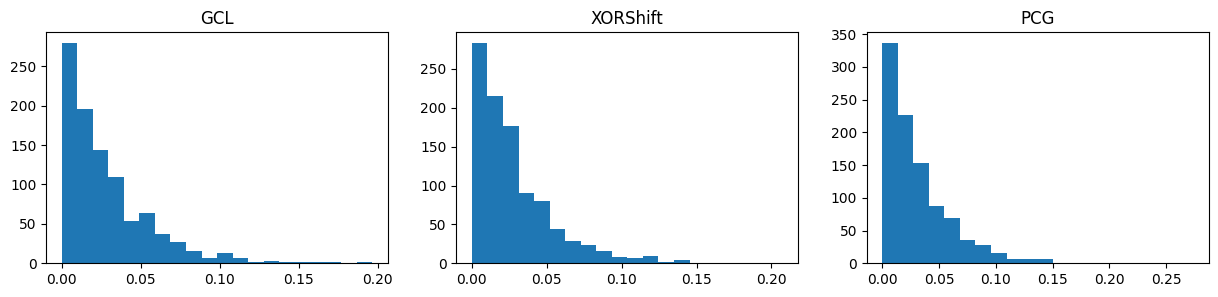

In [26]:
# Distribución del tiempo entre arribo

fig, ax = plt.subplots(1,len(nombres), figsize=(15, 3))

for i in range(len(nombres)):
    df, nombre = dataframes[i], nombres[i]
    ax[i].hist(df['TLlegada'], bins=20)
    ax[i].set_title(nombre)

# Distribución del tiempo entre arribo

fig, ax = plt.subplots(1,len(nombres), figsize=(15, 3))

for i in range(len(nombres)):
    df, nombre = dataframes[i], nombres[i]
    ax[i].hist(df['Duracion'], bins=20)
    ax[i].set_title(nombre)

plt.show()